In [2]:
import pandas as pd

# Check the actual file name first by listing files
import os
for dirname, _, filenames in os.walk('/kaggle/input/iris'):
    for filename in filenames:
        print(filename)


Iris.csv
database.sqlite


In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=df.drop(columns=['Species'])
y=df['Species']

sc.fit(X,y)


StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

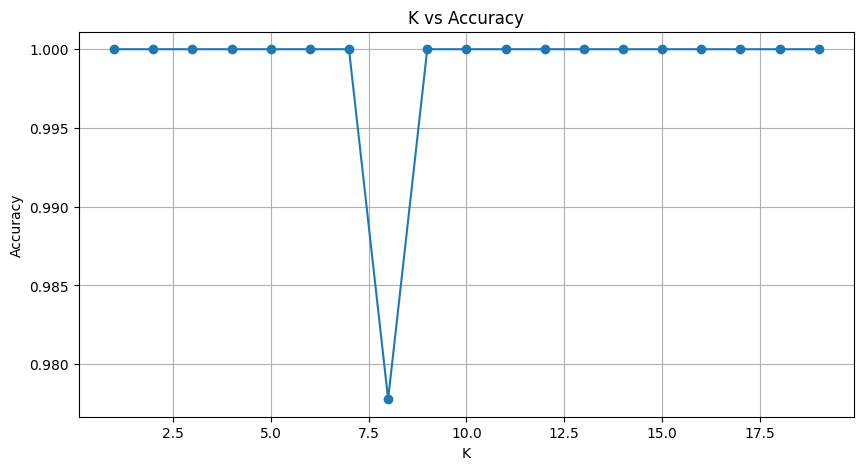

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracies = []
k_values = range(1, 20)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


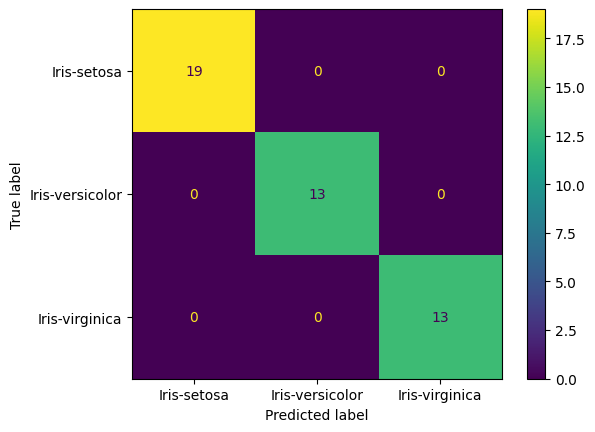

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()